### Bài toán cái túi (Knapsack Problem)
Đầu vào:
- Danh sách giá trị của từng đồ vật $profit$
- Danh sách cân nặng tương ứng $weight$
- Trọng lượng có thể mang theo $capacity$  

Đầu ra:
- Phương án mang đồ vật

In [27]:
import numpy as np # type: ignore
import random
import copy
import matplotlib.pyplot as plt # type: ignore

In [28]:
class Problem:
    def __init__(self, profit, weight, capacity):
        self.profit = profit
        self.weight = weight
        self.capacity = capacity


In [29]:
def decode(chromosome):
    chr = chromosome.tolist()
    return np.array([0 if gen < 0.5 else 1 for gen in chr])

def get_fitness(chromosome, problem : Problem):
    solution = decode(chromosome)
    total_profit = np.sum(solution * problem.profit)
    total_weight = np.sum(solution * problem.weight)
    if total_weight > problem.capacity:
        return 0
    else:
        return total_profit


In [30]:
class Individual:
    def __init__(self):
        self.chromosome = None
        self.fitness = None

    def gen_indi(self, problem : Problem):
        num_item = problem.profit.size
        self.chromosome = np.random.uniform(0.0, 1.0, num_item)

    def cal_fitness(self, problem : Problem):
        self.fitness = get_fitness(self.chromosome, problem)

    def clone(self):
        return copy.deepcopy(self)

    def __repr__(self):
        return f"chromosome={self.chromosome}, fitness={self.fitness}"


In [31]:
# Simulated binary crossover - SBX
def crossover(parent1, parent2, problem : Problem, eta = 2.0):
    off1 = Individual()
    off2 = Individual()
    r = np.random.rand()
    if (r <= 0.5):
        beta = (2*r)**(1.0/(eta + 1))
    else:
        beta = (1.0/(2*(1 - r)))**(1.0/(eta + 1))
    p1 = parent1.chromosome
    p2 = parent2.chromosome
    c1 = 0.5 * ((1 + beta) * p1 + (1 - beta) * p2)
    c2 = 0.5 * ((1 - beta) * p1 + (1 + beta) * p2)
    c1 = np.clip(c1, 0.0, 1.0)
    c2 = np.clip(c2, 0.0, 1.0)
    off1.chromosome = c1
    off2.chromosome = c2
    return off1.clone(), off2.clone()

In [32]:

# Polynomial mutaion - PM
def mutation(indi, eta = 20.0):
    chr = indi.chromosome
    for i in range(chr.size):
        mu = np.random.rand()
        if (mu <= 0.5):
            delta = (2 * mu)**(1.0/(1 + eta)) - 1
            chr[i] = chr[i] + delta * chr[i]
        else:
            delta = 1 - (2 - 2*mu)**(1.0/(1 + eta))
            chr[i] = chr[i] + delta * (1 - chr[i])

    chr = np.clip(chr, 0.0, 1.0)
    indi.chromosome = chr
    return indi.clone()

In [33]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.list_indi = []
        self.problem = problem

    def genPop(self):
        for i in range(self.pop_size):
            indi = Individual()
            indi.gen_indi(self.problem)
            indi.cal_fitness(self.problem)
            self.list_indi.append(indi)

    def show(self):
        for i in range(len(self.list_indi)):
            print(f"Individual {i}: {self.list_indi[i]}")

In [34]:
def selection(list, k = 2):
    tour1 = random.sample(list, k)
    tour2 = random.sample(list, k)
    x = max(tour1, key=lambda indi: indi.fitness)
    y = max(tour2, key=lambda indi: indi.fitness)
    return x.clone(), y.clone()

In [35]:
def survival_selection(list, pop_size):
    list = sorted(list, key=lambda indi: indi.fitness, reverse=True)
    list = list[0: pop_size]
    return list

In [36]:
def GA(problem, pop_size, max_gen, p_c, p_m):
    pop = Population(pop_size, problem)
    pop.genPop()
    history = []
    for i in range(max_gen):
        child = []
        while (len(child) < pop_size):
            p1, p2 = selection(pop.list_indi)
            if np.random.rand() <= p_c:
                c1, c2 = crossover(p1, p2, problem)
                c1.cal_fitness(problem)
                c2.cal_fitness(problem)
                child.append(c1)
                child.append(c2)
            if np.random.rand() <= p_m:
                p1 = mutation(p1)
                p2 = mutation(p2)
                p1.cal_fitness(problem)
                p2.cal_fitness(problem)
                child.append(p1)
                child.append(p2)
        pop.list_indi = survival_selection(pop.list_indi + child, pop_size)
        history.append(pop.list_indi[0].fitness)
    solution = pop.list_indi[0]
    return history, solution

In [37]:
# setup
profit = np.array([6.62, 11.21, 16.05, 9.52, 9.22, 10.85, 12.53, 10.95, 17.37, 7.96])
weight = np.array([7.11, 5.44, 10.86, 3.82, 12.96, 8.13, 3.78, 12.49, 13.53, 15.47])
capacity = 65.17
# profit = np.array([3, 6, 8, 10, 15])
# weight = np.array([2, 3, 3, 5, 8])
# capacity = 10
problem = Problem(profit, weight, capacity)

pop_size = 100
max_gen = 500
Pc = 0.8
Pm = 1.0

#start
fitness_history, solution = GA(problem, pop_size, max_gen, Pc, Pm)
%timeit GA(problem, pop_size, max_gen, Pc, Pm)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, bestfitness = {fitness_history[i]:.2f}")

3.32 s ± 338 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Generation 0, bestfitness = 75.97
Generation 1, bestfitness = 77.23
Generation 2, bestfitness = 80.39
Generation 3, bestfitness = 80.39
Generation 4, bestfitness = 80.39
Generation 5, bestfitness = 80.39
Generation 6, bestfitness = 80.39
Generation 7, bestfitness = 80.39
Generation 8, bestfitness = 80.39
Generation 9, bestfitness = 80.39
Generation 10, bestfitness = 80.39
Generation 11, bestfitness = 80.39
Generation 12, bestfitness = 80.39
Generation 13, bestfitness = 80.39
Generation 14, bestfitness = 80.39
Generation 15, bestfitness = 80.39
Generation 16, bestfitness = 80.39
Generation 17, bestfitness = 80.39
Generation 18, bestfitness = 80.39
Generation 19, bestfitness = 80.39
Generation 20, bestfitness = 80.39
Generation 21, bestfitness = 88.48
Generation 22, bestfitness = 88.48
Generation 23, bestfitness = 88.48
Generation 24, bestfitness = 88.48
Generation 25, bestfitness = 88.48
Generation 26, bestfitness = 88.4

In [38]:
np.set_printoptions(precision=2, suppress=True)
print("problem:")
print(f"profit: {profit}")
print(f"weight: {weight}")
print(f"capacity = {capacity:.2f}")
print()
print("solution:")
print(decode(solution.chromosome))
print(f"total_profit =  {solution.fitness:.2f}")
print(f"total_weight = {np.sum(decode(solution.chromosome) * weight):.2f}")

problem:
profit: [ 6.62 11.21 16.05  9.52  9.22 10.85 12.53 10.95 17.37  7.96]
weight: [ 7.11  5.44 10.86  3.82 12.96  8.13  3.78 12.49 13.53 15.47]
capacity = 65.17

solution:
[0 1 1 1 0 1 1 1 1 0]
total_profit =  88.48
total_weight = 58.05


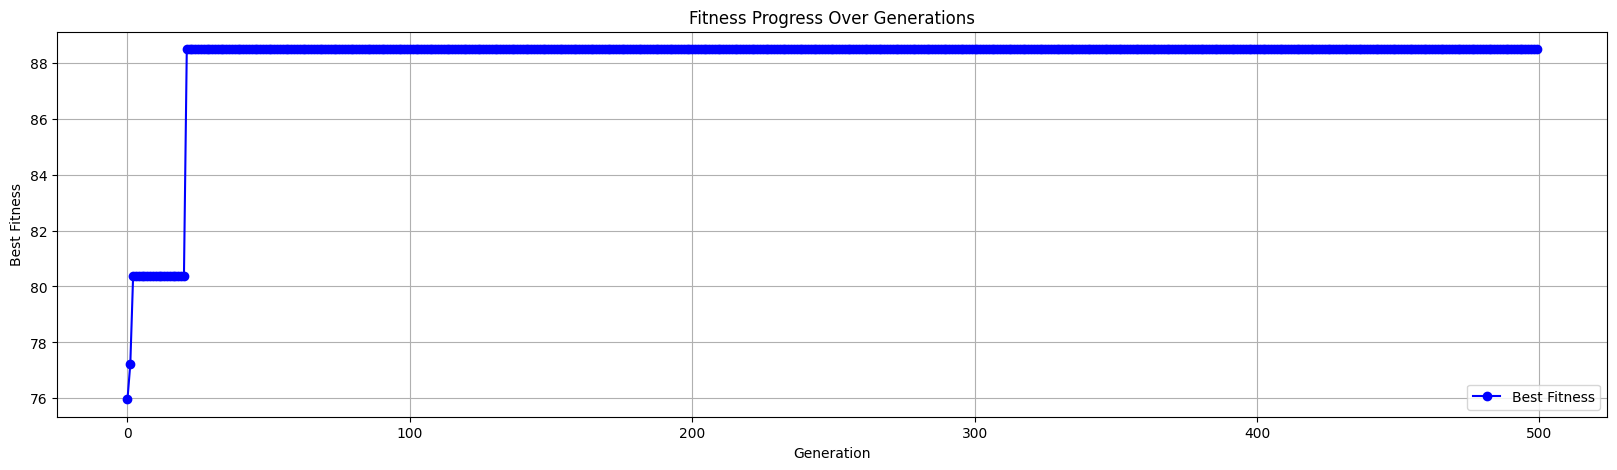

In [39]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(20, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()